### ANALYZE PSEI PRICE PERFORMANCE USING SENTIMENTAL AND NUMERICAL ANALYSIS, AND FORECAST PRICE USING MACHINE LEARNING (PART 2)

##### Forecasting using Prophet Model

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
#Import dataset
df_price = pd.read_csv('C:/Users/Jan/Desktop/JAN/GRIP-INTERNSHIP/PSEI-Analysis/PSEI(2014-2023).csv')
#Transform dataset
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price = df_price.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df_price = df_price.dropna().set_index('Date').sort_values(by='Date')
display(df_price)

,Close
Date,
2014-01-02,5984.259766
2014-01-03,5947.930176
2014-01-06,5985.810059
2014-01-07,5947.439941
2014-01-08,5986.479980
...,...
2023-05-08,6600.740234
2023-05-09,6622.609863
2023-05-10,6658.589844


### Forcasting using prophet model

In [4]:
# Feature engineering
df_prophet = df_price.reset_index()
df_prophet.columns = ['ds', 'y']

# Build and train model for testing/getting accuracy
model_Prophet = Prophet(daily_seasonality=True, interval_width=0.8)

train_data = df_prophet.iloc[:int(.80*len(df_prophet)), :]
test_data = df_prophet.iloc[int(.80*len(df_prophet)):, :]
print(train_data.shape , test_data.shape)

# Determine Model Accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_Prophet.fit(train_data)

# Make predictions on the test dataset
test_forecast = model_Prophet.predict(test_data)

y_true = test_data['y'].values
y_pred = test_forecast['yhat'].values

# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Print Accuracy of the model
accuracy = 100 - mape
print(f"Accuracy: {accuracy}%")

(1824, 2) (456, 2)


01:49:44 - cmdstanpy - INFO - Chain [1] start processing
01:49:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 480.9692522151331
Mean Squared Error (MSE): 307969.22580565355
Root Mean Squared Error (RMSE): 554.9497507032988
Mean Absolute Percentage Error (MAPE): 6.939085941984999
Accuracy: 93.060914058015%


In [5]:
# Build and Train model for actual forecasting
model_Prophet2 = Prophet(daily_seasonality=True, interval_width=0.8)
model_Prophet2.fit(df_prophet)

01:50:27 - cmdstanpy - INFO - Chain [1] start processing
01:50:28 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2014-01-02,6005.063694,5691.189419,6335.240927
1,2014-01-03,6019.358572,5670.512712,6356.542181
2,2014-01-06,6069.289652,5716.108287,6376.473716
3,2014-01-07,6085.558766,5723.467016,6439.675287
4,2014-01-08,6106.765813,5774.818590,6457.999661
...,...,...,...,...
2535,2024-05-06,6109.648197,4199.393100,7953.497102
2536,2024-05-07,6103.244658,4165.241739,7975.576100
2537,2024-05-08,6102.751541,4148.018105,8133.194862
2538,2024-05-09,6098.995707,4104.520165,8070.270602


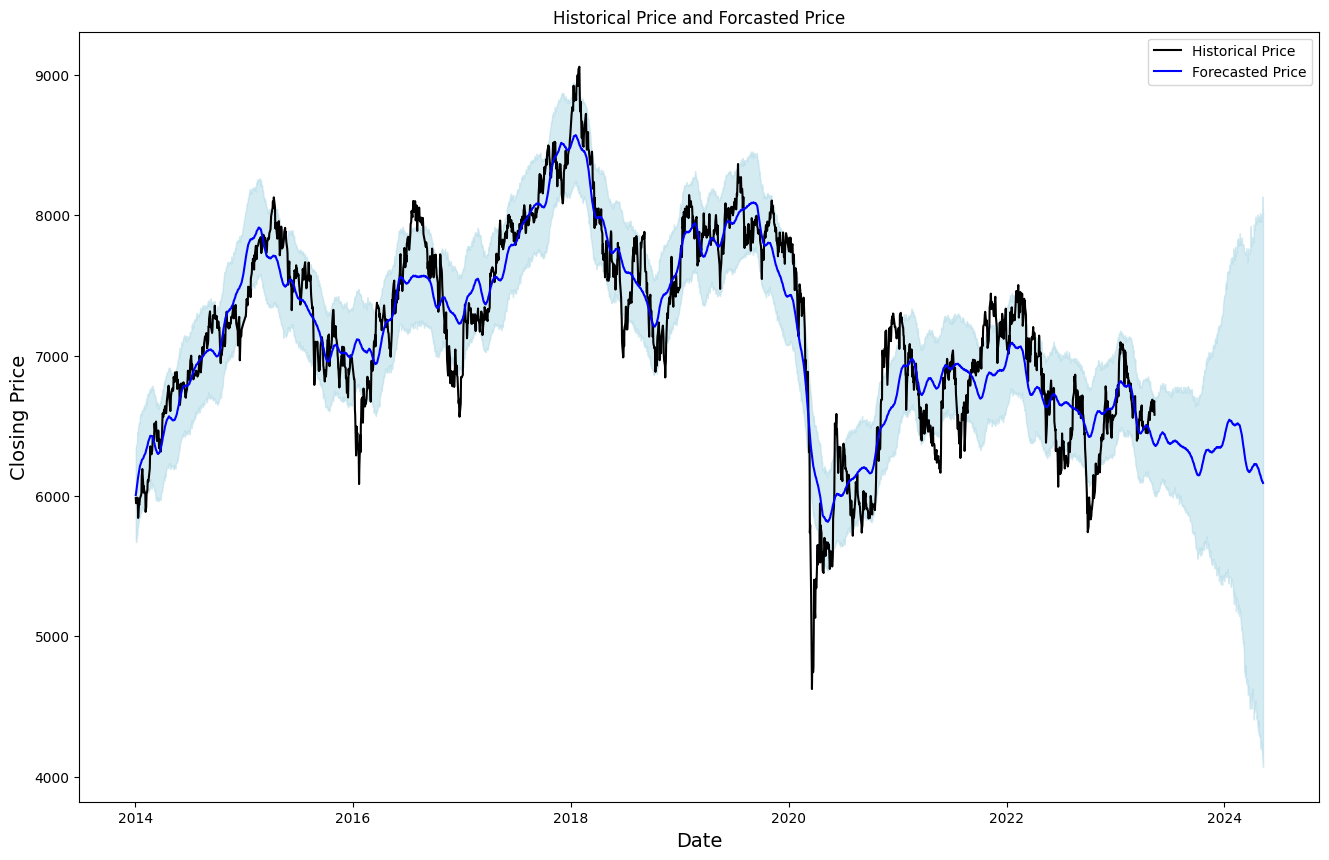

In [6]:
future_dates = model_Prophet2.make_future_dataframe(periods=365)
future_dates = future_dates[future_dates['ds'].dt.weekday < 5]
prophet_forecast  = model_Prophet2.predict(future_dates)
display(prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

plt.figure(figsize=(16, 10))
plt.plot(df_price.index, df_price['Close'], color='black', label='Historical Price')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], color='blue', label='Forecasted Price')
plt.fill_between(prophet_forecast['ds'], prophet_forecast['yhat_lower'], prophet_forecast['yhat_upper'], color='lightblue', alpha=0.5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.legend()
plt.title('Historical Price and Forcasted Price')
plt.show() 

In [7]:
df_forecast_prophet = pd.DataFrame()
df_forecast_prophet['Date'] = prophet_forecast['ds']
df_forecast_prophet['yhat'] = prophet_forecast['yhat']
df_forecast_prophet['yhat_lower'] = prophet_forecast['yhat_lower']
df_forecast_prophet['yhat_upper'] = prophet_forecast['yhat_upper']
display(df_forecast_prophet)

,Date,yhat,yhat_lower,yhat_upper
0,2014-01-02,6005.063694,5691.189419,6335.240927
1,2014-01-03,6019.358572,5670.512712,6356.542181
2,2014-01-06,6069.289652,5716.108287,6376.473716
3,2014-01-07,6085.558766,5723.467016,6439.675287
4,2014-01-08,6106.765813,5774.818590,6457.999661
...,...,...,...,...
2535,2024-05-06,6109.648197,4199.393100,7953.497102
2536,2024-05-07,6103.244658,4165.241739,7975.576100
2537,2024-05-08,6102.751541,4148.018105,8133.194862
2538,2024-05-09,6098.995707,4104.520165,8070.270602


In [ ]:
# df_forecast_prophet.to_excel('df_forecast_prophet.xlsx', index=False)